<a href="https://colab.research.google.com/github/AnahitaNouri/Obejct_Detection_YOLOv5_Faster_R_CNN/blob/main/Object_Detection_YOLOv5_Faster_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5

In [ ]:
import os
import random
import shutil

def create_directories(base_path):
    """Create the directory structure for YOLOv5 dataset."""
    dirs = [
        os.path.join(base_path, 'images', 'train'),
        os.path.join(base_path, 'images', 'test'),
        os.path.join(base_path, 'images', 'val'),
        os.path.join(base_path, 'labels', 'train'),
        os.path.join(base_path, 'labels', 'test'),
        os.path.join(base_path, 'labels', 'val')
    ]
    for dir_path in dirs:
        os.makedirs(dir_path, exist_ok=True)
    print("Directory structure created successfully.")

def split_data(source_dir, base_path, split_ratio=(0.7, 0.2, 0.1), seed=42):
    """Split the data into train, validation, and test sets with a fixed random seed."""
    random.seed(seed)

    image_dir = os.path.join(source_dir, 'images')
    annotation_dir = os.path.join(source_dir, 'annotations')

    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    random.shuffle(image_files)

    train_split = int(len(image_files) * split_ratio[0])
    val_split = int(len(image_files) * (split_ratio[0] + split_ratio[1]))

    train_files = image_files[:train_split]
    val_files = image_files[train_split:val_split]
    test_files = image_files[val_split:]

    def copy_files(file_list, subset):
        for file in file_list:
            image_source = os.path.join(image_dir, file)
            annotation_source = os.path.join(annotation_dir, os.path.splitext(file)[0] + '.xml')

            image_dest = os.path.join(base_path, 'images', subset, file)
            label_dest = os.path.join(base_path, 'labels', subset, os.path.splitext(file)[0] + '.txt')

            # Copy image
            shutil.copy(image_source, image_dest)

            # Convert and copy annotation if it exists
            if os.path.exists(annotation_source):
                convert_annotation(annotation_source, label_dest)
            else:
                print(f"Warning: Annotation file not found for {file}")

    copy_files(train_files, 'train')
    copy_files(val_files, 'val')
    copy_files(test_files, 'test')

    print(f"Data split complete. Train: {len(train_files)}, Val: {len(val_files)}, Test: {len(test_files)}")
    print(f"Random seed used: {seed}")

def convert_annotation(xml_file, txt_file):
    """Convert PASCAL VOC annotation to YOLO format."""
    import xml.etree.ElementTree as ET

    tree = ET.parse(xml_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    with open(txt_file, 'w') as out_file:
        for obj in root.iter('object'):
            difficult = obj.find('difficult').text
            cls = obj.find('name').text
            if cls not in ['helmet', 'person', 'head'] or int(difficult) == 1:
                continue
            cls_id = ['helmet', 'person', 'head'].index(cls)
            xmlbox = obj.find('bndbox')
            b = (float(xmlbox.find('xmin').text), float(xmlbox.find('ymin').text),
                 float(xmlbox.find('xmax').text), float(xmlbox.find('ymax').text))
            bb = convert_bbox((w, h), b)
            out_file.write(f"{cls_id} {' '.join([str(a) for a in bb])}\n")

def convert_bbox(size, box):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = (box[0] + box[2]) / 2.0
    y = (box[1] + box[3]) / 2.0
    w = box[2] - box[0]
    h = box[3] - box[1]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

# Usage
base_path = '/teamspace/studios/this_studio/Dataset_Helmet'
source_dir = '/teamspace/studios/this_studio/Dataset_2'
random_seed = 42

create_directories(base_path)
split_data(source_dir, base_path, seed=random_seed)

Directory structure created successfully.


Data split complete. Train: 3500, Val: 1000, Test: 500
Random seed used: 42


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...



In [ ]:
cd yolov5/

/teamspace/studios/this_studio/yolov5


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
supervisely 6.73.124 requires pillow<=10.2.0,>=5.4.1, but you have pillow 10.4.0 which is incompatible.

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data hat.yaml --weights yolov5s.pt --device 0 --seed 42

train: weights=yolov5s.pt, cfg=, data=hat.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=42, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-338-gff063284 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=

In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data hat.yaml --weights yolov5s.pt --device 0 --seed 42

train: weights=yolov5s.pt, cfg=, data=hat.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=42, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-338-gff063284 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj

# Faster R CNN

In [ ]:
import os
import xml.etree.ElementTree as ET
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image
from tqdm import tqdm
import logging
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from torch.cuda.amp import autocast, GradScaler
import random
import numpy as np
from torchvision.ops import box_iou
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s - %(message)s')

# Set random seed for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed()

class HardHatDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = list(sorted(os.listdir(os.path.join(root_dir, "images"))))
        self.annotations = list(sorted(os.listdir(os.path.join(root_dir, "annotations"))))
        logging.info(f"Dataset initialized with {len(self.images)} images")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, "images", self.images[idx])
        ann_path = os.path.join(self.root_dir, "annotations", self.annotations[idx])

        img = Image.open(img_path).convert("RGB")

        # Parse the XML annotation file
        tree = ET.parse(ann_path)
        root = tree.getroot()

        boxes = []
        labels = []
        for obj in root.findall('object'):
            name = obj.find('name').text
            bbox = obj.find('bndbox')
            xmin = float(bbox.find('xmin').text)
            ymin = float(bbox.find('ymin').text)
            xmax = float(bbox.find('xmax').text)
            ymax = float(bbox.find('ymax').text)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(name)

        # Convert to tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor([self.class_to_idx(label) for label in labels], dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels

        if self.transform:
            img = self.transform(img)

        return img, target

    def class_to_idx(self, class_name):
        class_dict = {"helmet": 1, "person": 2, "head": 3}
        return class_dict[class_name]

# Define the data transforms
data_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Custom collate function
def collate_fn(batch):
    return tuple(zip(*batch))



In [ ]:
# Create the dataset
dataset = HardHatDataset(root_dir="/teamspace/studios/this_studio/Dataset", transform=data_transform)

# Split the dataset
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset, _ = torch.utils.data.random_split(
    dataset,
    [train_size, val_size, test_size, total_size - (train_size + val_size + test_size)],
    generator=torch.Generator().manual_seed(42)
)

logging.info(f"Dataset split: Train {len(train_dataset)}, Validation {len(val_dataset)}, Test {len(test_dataset)}")



INFO - Dataset initialized with 5000 images
INFO - Dataset split: Train 3500, Validation 1000, Test 500


In [ ]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=8, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=8, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=8, collate_fn=collate_fn)

# Load a pre-trained model
model = fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
logging.info("Loaded pre-trained Faster R-CNN MobileNet V3 Large FPN model")

# Replace the classifier with a new one for the dataset
num_classes = 4  # background + 3 classes
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
logging.info(f"Replaced classifier head with new one for {num_classes} classes")

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
logging.info(f"Using device: {device}")

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Initialize the metric
metric = MeanAveragePrecision()

def compute_loss(loss_dict):
    total_loss = sum(loss for loss in loss_dict.values())
    return total_loss

def validate(valid_data_loader, model, device):
    logging.info("Validating...")
    val_loss_list = []
    all_preds = []
    all_targets = []

    model.eval()
    with torch.no_grad():
        prog_bar = tqdm(valid_data_loader, total=len(valid_data_loader))

        for images, targets in prog_bar:
            images = [image.to(device) for image in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Compute loss
            model.train()
            with autocast():
                loss_dict = model(images, targets)
                if isinstance(loss_dict, dict):
                    losses = compute_loss(loss_dict)
                    loss_value = losses.item()
                    val_loss_list.append(loss_value)
                    prog_bar.set_description(desc=f"Loss: {loss_value:.4f}")
            model.eval()

            # Get predictions
            outputs = model(images)
            all_preds.extend(outputs)
            all_targets.extend(targets)

    avg_val_loss = np.mean(val_loss_list) if val_loss_list else float('inf')
    logging.info(f"Validation Loss: {avg_val_loss:.4f}")

    return avg_val_loss, all_preds, all_targets



def compute_metrics(all_preds, all_targets):
    metric = MeanAveragePrecision(box_format='xyxy', iou_type='bbox')
    metric.update(all_preds, all_targets)
    result = metric.compute()

    class_names = ['helmet', 'person', 'head']
    class_metrics = {name: {'images': 0, 'instances': 0, 'P': 0, 'R': 0, 'TP': 0, 'FP': 0, 'FN': 0} for name in class_names}

    total_images = len(all_targets)

    for target in all_targets:
        classes_in_image = set()
        for label in target['labels']:
            class_name = class_names[label.item() - 1]
            class_metrics[class_name]['instances'] += 1
            classes_in_image.add(class_name)
        for class_name in classes_in_image:
            class_metrics[class_name]['images'] += 1

    for pred, target in zip(all_preds, all_targets):
        pred_classes = pred['labels'].cpu().numpy()
        pred_scores = pred['scores'].cpu().numpy()
        pred_boxes = pred['boxes'].cpu().numpy()

        target_classes = target['labels'].cpu().numpy()
        target_boxes = target['boxes'].cpu().numpy()

        for c in class_names:
            pred_class_mask = pred_classes == (class_names.index(c) + 1)
            target_class_mask = target_classes == (class_names.index(c) + 1)

            pred_class_boxes = pred_boxes[pred_class_mask]
            pred_class_scores = pred_scores[pred_class_mask]
            target_class_boxes = target_boxes[target_class_mask]

            if len(pred_class_boxes) > 0 and len(target_class_boxes) > 0:
                ious = box_iou(torch.tensor(pred_class_boxes), torch.tensor(target_class_boxes))
                max_ious, _ = ious.max(dim=1)

                class_metrics[c]['TP'] += ((max_ious > 0.5) & (pred_class_scores > 0.5)).sum().item()
                class_metrics[c]['FP'] += ((max_ious <= 0.5) & (pred_class_scores > 0.5)).sum().item()
                class_metrics[c]['FN'] += (max_ious <= 0.5).sum().item()
            elif len(pred_class_boxes) > 0:
                class_metrics[c]['FP'] += (pred_class_scores > 0.5).sum().item()
            elif len(target_class_boxes) > 0:
                class_metrics[c]['FN'] += len(target_class_boxes)

    for metrics in class_metrics.values():
        if metrics['TP'] + metrics['FP'] > 0:
            metrics['P'] = metrics['TP'] / (metrics['TP'] + metrics['FP'])
        if metrics['TP'] + metrics['FN'] > 0:
            metrics['R'] = metrics['TP'] / (metrics['TP'] + metrics['FN'])

    # Prepare data for tabulate
    headers = ['Class', 'Images', 'Instances', 'P', 'R', 'mAP50', 'mAP']
    table_data = [
        ['all', total_images, sum(metrics['instances'] for metrics in class_metrics.values()),
         f"{result['map_50'].item():.3f}", f"{result['map'].item():.3f}",
         f"{result['map_50'].item():.3f}", f"{result['map'].item():.3f}"]
    ]

    for class_name, metrics in class_metrics.items():
        table_data.append([
            class_name, metrics['images'], metrics['instances'],
            f"{metrics['P']:.3f}", f"{metrics['R']:.3f}", "-", "-"
        ])

    # Print formatted table
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    return class_metrics, result

def calculate_confusion_matrix(all_preds, all_targets, class_names, iou_threshold=0.5, conf_threshold=0.5):
    num_classes = len(class_names)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for pred, target in zip(all_preds, all_targets):
        pred_classes = pred['labels'].cpu().numpy()
        pred_scores = pred['scores'].cpu().numpy()
        pred_boxes = pred['boxes'].cpu().numpy()

        target_classes = target['labels'].cpu().numpy()
        target_boxes = target['boxes'].cpu().numpy()

        for true_class in range(num_classes):
            true_class_mask = target_classes == (true_class + 1)
            true_class_boxes = target_boxes[true_class_mask]

            if len(true_class_boxes) == 0:
                continue

            for pred_class in range(num_classes):
                pred_class_mask = (pred_classes == (pred_class + 1)) & (pred_scores > conf_threshold)
                pred_class_boxes = pred_boxes[pred_class_mask]

                if len(pred_class_boxes) == 0:
                    continue

                ious = box_iou(torch.tensor(pred_class_boxes), torch.tensor(true_class_boxes))
                max_ious, _ = ious.max(dim=1)

                confusion_matrix[true_class, pred_class] += (max_ious > iou_threshold).sum().item()

    return confusion_matrix

def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.close()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
INFO - Loaded pre-trained Faster R-CNN MobileNet V3 Large FPN model
INFO - Replaced classifier head with new one for 4 classes
INFO - Using device: cuda


In [ ]:
# Training loop with best model saving
num_epochs = 50
scaler = GradScaler()
best_val_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch") as tepoch:
        for images, targets in tepoch:
            images = [image.to(device) for image in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            optimizer.zero_grad()

            with autocast():
                loss_dict = model(images, targets)
                total_loss = compute_loss(loss_dict)

            scaler.scale(total_loss).backward()
            scaler.step(optimizer)
            scaler.update()

            epoch_loss += total_loss.item()
            tepoch.set_postfix(loss=total_loss.item())

    avg_loss = epoch_loss / len(train_loader)
    logging.info(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

    # Validation
    avg_val_loss, _, _ = validate(val_loader, model, device)

    # Check if this is the best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'faster_r_cnn_best_model.pth')
        logging.info(f"New best model saved with validation loss: {best_val_loss:.4f}")

    lr_scheduler.step()

logging.info("Training completed.")

# Load the best model
model.load_state_dict(torch.load('faster_r_cnn_best_model.pth'))
_, all_preds, all_targets = validate(test_loader, model, device)

Epoch 1/50: 100%|██████████| 55/55 [01:25<00:00,  1.56s/batch, loss=0.512]
INFO - Epoch 1/50, Average Loss: 0.8578
INFO - Validating...
Loss: 0.4967: 100%|██████████| 16/16 [00:29<00:00,  1.84s/it]
INFO - Validation Loss: 0.4968
INFO - New best model saved with validation loss: 0.4968
Epoch 2/50: 100%|██████████| 55/55 [01:22<00:00,  1.51s/batch, loss=0.59] 
INFO - Epoch 2/50, Average Loss: 0.4876
INFO - Validating...
Loss: 0.5512: 100%|██████████| 16/16 [00:27<00:00,  1.72s/it]
INFO - Validation Loss: 0.5887
Epoch 3/50: 100%|██████████| 55/55 [01:21<00:00,  1.48s/batch, loss=0.517]
INFO - Epoch 3/50, Average Loss: 0.4702
INFO - Validating...
Loss: 0.4757: 100%|██████████| 16/16 [00:27<00:00,  1.71s/it]
INFO - Validation Loss: 0.4951
INFO - New best model saved with validation loss: 0.4951
Epoch 4/50: 100%|██████████| 55/55 [01:20<00:00,  1.46s/batch, loss=0.399]
INFO - Epoch 4/50, Average Loss: 0.4249
INFO - Validating...
Loss: 0.4411: 100%|██████████| 16/16 [00:27<00:00,  1.72s/it]
I

In [ ]:
class_metrics, result = compute_metrics(all_preds, all_targets)
confusion_matrix = calculate_confusion_matrix(all_preds, all_targets, ['helmet', 'person', 'head'])
plot_confusion_matrix(confusion_matrix, ['helmet', 'person', 'head'])

+---------+----------+-------------+-------+-------+---------+-------+
| Class   |   Images |   Instances |     P |     R | mAP50   | mAP   |
+=========+==========+=============+=======+=======+=========+=======+
| all     |      500 |        2625 | 0.576 | 0.349 | 0.576   | 0.349 |
+---------+----------+-------------+-------+-------+---------+-------+
| helmet  |      466 |        1989 | 0.876 | 0.497 | -       | -     |
+---------+----------+-------------+-------+-------+---------+-------+
| person  |       23 |         120 | 0     | 0     | -       | -     |
+---------+----------+-------------+-------+-------+---------+-------+
| head    |       80 |         516 | 0.871 | 0.495 | -       | -     |
+---------+----------+-------------+-------+-------+---------+-------+


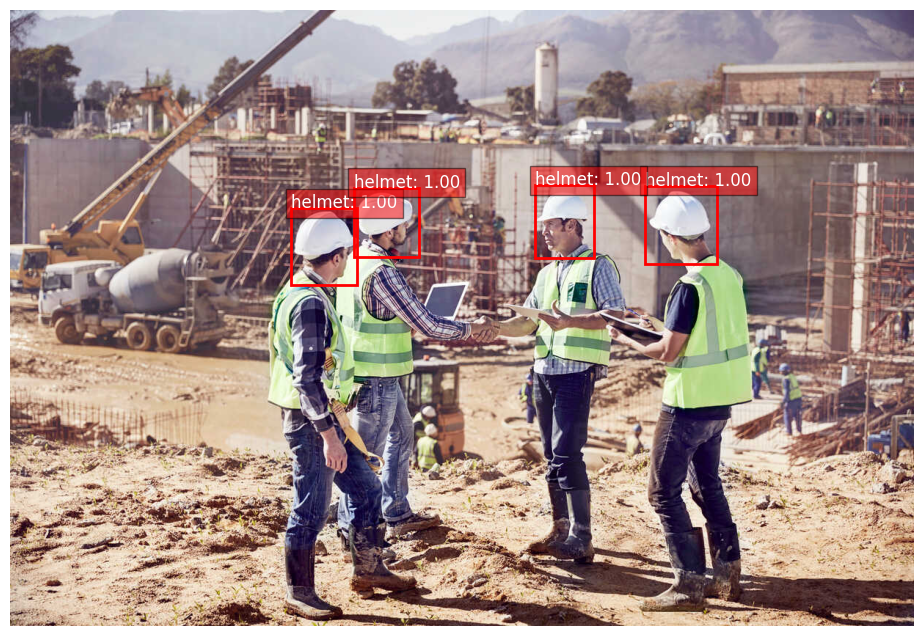

In [ ]:
import torch
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the transformations for the input image
transform = transforms.Compose([
    transforms.ToTensor(),

])

# Load the saved model
num_classes = 4  # 3 classes (helmet, person, head) + 1 background
model = fasterrcnn_mobilenet_v3_large_fpn(pretrained=False, num_classes=num_classes)
model.load_state_dict(torch.load('faster_r_cnn_best_model.pth'))
model.eval()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

def plot_predictions(image, predictions, threshold=0.5):
    # Convert tensor to PIL image
    image = transforms.ToPILImage()(image.squeeze(0).cpu())
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    ax = plt.gca()

    labels_map = {1: 'helmet', 2: 'person', 3: 'head'}  # Adjust the label mapping

    for element in predictions:
        boxes = element['boxes']
        labels = element['labels']
        scores = element['scores']

        for box, label, score in zip(boxes, labels, scores):
            if score > threshold:
                x1, y1, x2, y2 = box.detach().cpu().numpy()
                width, height = x2 - x1, y2 - y1
                color = 'red'
                rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor=color, facecolor='none')
                ax.add_patch(rect)
                plt.text(x1, y1, f'{labels_map[label.item()]}: {score:.2f}', color='white', fontsize=12, bbox=dict(facecolor=color, alpha=0.5))

    plt.axis('off')
    plt.show()

# Image path
image_path = '/teamspace/studios/this_studio/CAIF09313.jpg'

# Load and preprocess the image
image = load_image(image_path)

# Perform inference
with torch.no_grad():
    predictions = model(image)

# Plot the predictions
plot_predictions(image, predictions)


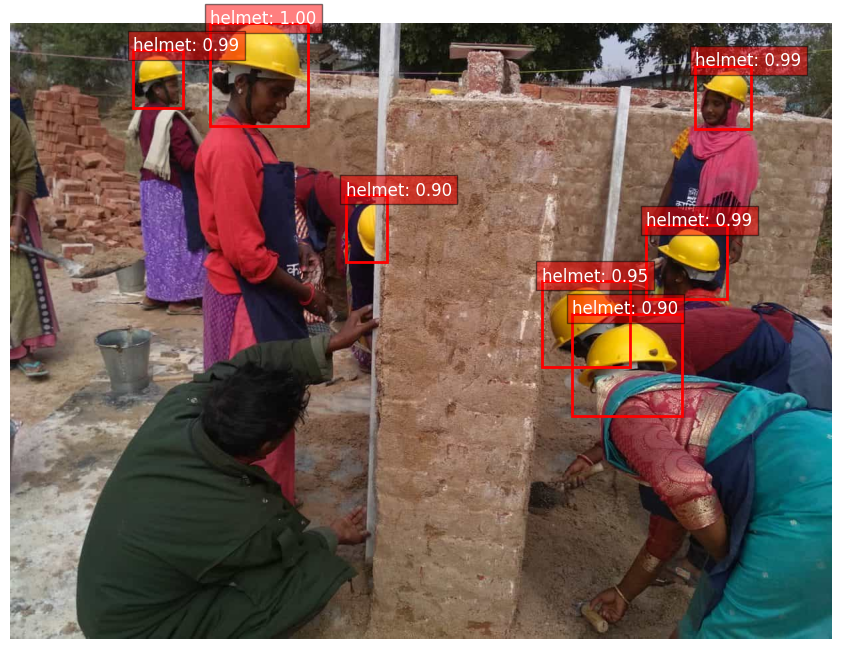

In [ ]:
import torch
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the transformations for the input image
transform = transforms.Compose([
    transforms.ToTensor(),

])

# Load the saved model
num_classes = 4  # 3 classes (helmet, person, head) + 1 background
model = fasterrcnn_mobilenet_v3_large_fpn(pretrained=False, num_classes=num_classes)
model.load_state_dict(torch.load('faster_r_cnn_best_model.pth'))
model.eval()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

def plot_predictions(image, predictions, threshold=0.5):
    # Convert tensor to PIL image
    image = transforms.ToPILImage()(image.squeeze(0).cpu())
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    ax = plt.gca()

    labels_map = {1: 'helmet', 2: 'person', 3: 'head'}  # Adjust the label mapping

    for element in predictions:
        boxes = element['boxes']
        labels = element['labels']
        scores = element['scores']

        for box, label, score in zip(boxes, labels, scores):
            if score > threshold:
                x1, y1, x2, y2 = box.detach().cpu().numpy()
                width, height = x2 - x1, y2 - y1
                color = 'red'
                rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor=color, facecolor='none')
                ax.add_patch(rect)
                plt.text(x1, y1, f'{labels_map[label.item()]}: {score:.2f}', color='white', fontsize=12, bbox=dict(facecolor=color, alpha=0.5))

    plt.axis('off')
    plt.show()

# Image path
image_path = '/teamspace/studios/this_studio/scaled.jpg'

# Load and preprocess the image
image = load_image(image_path)

# Perform inference
with torch.no_grad():
    predictions = model(image)

# Plot the predictions
plot_predictions(image, predictions)
